In [9]:
import icf
import matplotlib.pyplot as plt
import numpy as np
name_list = ["Horizontal.csv","45_Degrees.csv","Vertical.csv","135_Degrees.csv"]
xdata = []
ydata = []
for n in  range(0,len(name_list)):
    xd, yd = icf.load_2col(name_list[n])
    xdata.append(xd)
    ydata.append(yd)


In [10]:
for x in range (0,len(xdata)):
    xdata[x] *= 60 #resolution
    xdata[x] /= 3.5 #magnitication effect

In [11]:
import statistics as s
for x in range (0,len(xdata)):
    print("Mean:", s.mean(xdata[x]))
    print("Variance: ", s.variance(xdata[x]))
    print("Population stdev: ", s.pstdev(xdata[x]))
    print("Sample stdev: ", s.stdev(xdata[x]))

Mean: 437.14285714285717
Variance:  67493.87755102041
Population stdev:  257.28567462520516
Sample stdev:  259.79583820958413
Mean: 351.42857142857144
Variance:  44228.57142857143
Population stdev:  207.78717526373381
Sample stdev:  210.30589965231937
Mean: 291.42857142857144
Variance:  30857.14285714286
Population stdev:  173.13437037192134
Sample stdev:  175.66201313073597
Mean: 325.7142857142857
Variance:  38204.08163265306
Population stdev:  192.9364916129615
Sample stdev:  195.45864430270936


In [12]:
# Data Mask

for n in range (len(xdata)):
    xmin = icf . find_closest ( xdata[n] , 0 )
    xmax = icf . find_closest ( xdata[n] , 700 )
    print(xmin)
    print(xmax)
    xdata[n] = xdata[n] [ xmin : xmax]
    ydata[n] = ydata[n] [ xmin : xmax ]


0
41
0
41
0
34
0
38


Our initial guess is [4282, 411, 169, 27878, np.float64(1.6551208333333316)]
Parameter 0 : 3040.5645532557933 +/- 79.52279370825197
Parameter 1 : 374.1925662771845 +/- 2.8907013077708186
Parameter 2 : 147.7145359093353 +/- 2.1970890794551545
Parameter 3 : 28277.822450030526 +/- 82.20996696991654
Parameter 4 : 1.2026656548299572 +/- 0.2078151770033768
Fit parameters :  [3.04056455e+03 3.74192566e+02 1.47714536e+02 2.82778225e+04
 1.20266565e+00]
Fit standard deviations :  [79.52279371  2.89070131  2.19708908 82.20996697  0.20781518]
R^2 =  0.9805160023263485
Calculated Full Width Half Max 347.84115010174673


<>:69: SyntaxWarning: invalid escape sequence '\m'
<>:69: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_31747/3612065689.py:69: SyntaxWarning: invalid escape sequence '\m'
  icf.fit_plot(xdata[n], ydata[n], yfit[n],xl = 'Distance ($\mu m$)',yl = "Greyscale Value",title = name_list[n][0:-4],width = calculated_radius[n])


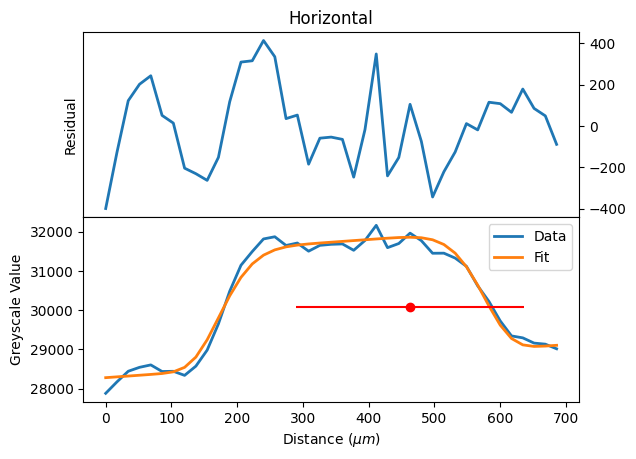

Our initial guess is [3333, 274, 169, 28592, np.float64(0.36937395833333314)]
Parameter 0 : 2906.378718161197 +/- 70.04976406782237
Parameter 1 : 321.1978909823895 +/- 2.7983250035755587
Parameter 2 : 156.03560858526617 +/- 2.0867257705184343
Parameter 3 : 28587.45367330946 +/- 95.43871386839085
Parameter 4 : 0.6617655396853959 +/- 0.18461892913338768
Fit parameters :  [2.90637872e+03 3.21197891e+02 1.56035609e+02 2.85874537e+04
 6.61765540e-01]
Fit standard deviations :  [70.04976407  2.798325    2.08672577 95.43871387  0.18461893]
R^2 =  0.9813582359799844
Calculated Full Width Half Max 367.4357788351881


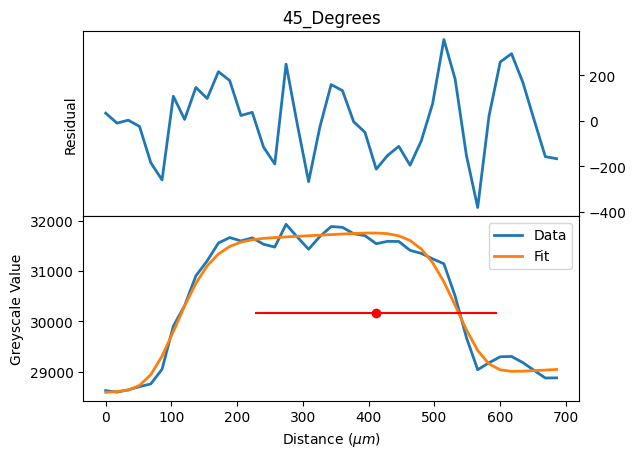

Our initial guess is [3280, 222, 169, 28661, np.float64(-0.23636313131313122)]
Parameter 0 : 2951.0281159176147 +/- 58.860324789065096
Parameter 1 : 289.28826155647903 +/- 2.081379352003096
Parameter 2 : 146.569950092822 +/- 1.4754763366104324
Parameter 3 : 28910.8496060166 +/- 71.01731872659276
Parameter 4 : -0.34221015072089783 +/- 0.18785724067904863
Fit parameters :  [ 2.95102812e+03  2.89288262e+02  1.46569950e+02  2.89108496e+04
 -3.42210151e-01]
Fit standard deviations :  [58.86032479  2.08137935  1.47547634 71.01731873  0.18785724]
R^2 =  0.991216837232288
Calculated Full Width Half Max 345.1458564777631


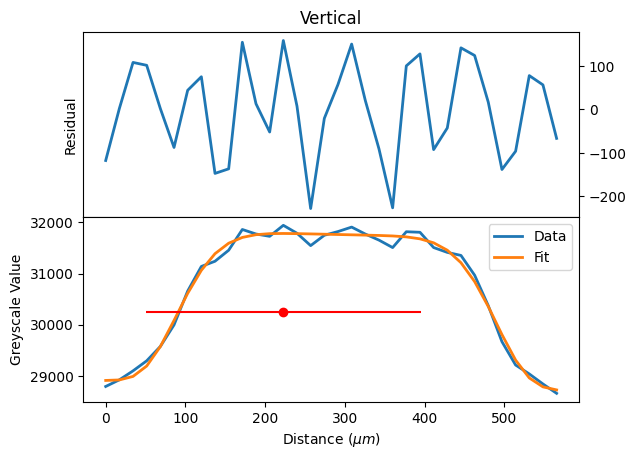

Our initial guess is [3606, 308, 169, 28357, np.float64(-0.8319594594594606)]
Parameter 0 : 3027.0662325025814 +/- 52.68949184337078
Parameter 1 : 328.9833590768537 +/- 1.8592006874556046
Parameter 2 : 141.35965893305877 +/- 1.3970223438961944
Parameter 3 : 29047.191634517872 +/- 60.26932860917752
Parameter 4 : -0.9233245145018386 +/- 0.14851518427222507
Fit parameters :  [ 3.02706623e+03  3.28983359e+02  1.41359659e+02  2.90471916e+04
 -9.23324515e-01]
Fit standard deviations :  [52.68949184  1.85920069  1.39702234 60.26932861  0.14851518]
R^2 =  0.9906733908259725
Calculated Full Width Half Max 332.87655841430507


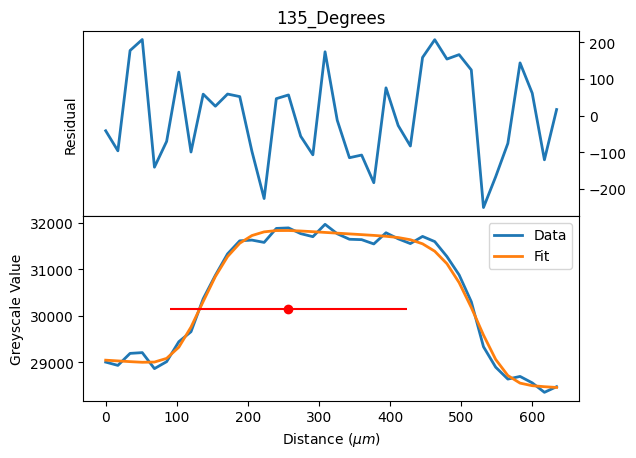

In [13]:
import numpy as np
from scipy.optimize import curve_fit
import icf
p = 6


# This function will generate a perfect Gaussian 
# You can replace this function with any other you want to fit with...
def gaussian(x, *params):

	A = params[0]
	x0 = params[1]
	c = params[2]
	y0 = params[3]
	
	return A*np.exp(-(x-x0)**2/(2*c*c))

def super_gaussian(x, *params):

	A = params[0]
	x0 = params[1]
	c = params[2]
	y0 = params[3]
	y1 = params[4]
	
	return y0 + y1*x+ A*np.exp(-((x-x0)/(np.sqrt(2)*c))**(p))


	
yfit  = []
for n in range(0,len(xdata)):
	yfit.append([])
calculated_radius = []	
#
# This makes a gaussian using these x points
for n in range(len(xdata)):



	#
	# This section will do a fit
	#

	# This does the fit, and returns the fit parameters and the covariances

	guess = [int(np.max(ydata[n])-np.min(ydata[n])),int(xdata[n][np.argmax(ydata[n])]),int(400/(2*np.sqrt(2*np.log(2)))),int(np.min(ydata[n])),(ydata[n][-1]-ydata[n][0])/xdata[n][-1]]
	print("Our initial guess is", guess)
	popt, pcov = curve_fit(super_gaussian, xdata[n], ydata[n], p0=guess)


	for i in range(len(popt)):
		print ("Parameter",i,":",popt[i],"+/-",np.sqrt(pcov[i][i]))
		
	print("Fit parameters : ", popt)
	print("Fit standard deviations : ", np.sqrt(np.diag(pcov)))


	# This generates a new list with a Gaussian using the identified fit parameters
	# This data is therefore the best fit curve 
	yfit[n] = super_gaussian(xdata[n], *popt)

	print("R^2 = ", icf.r_squared(ydata[n], yfit[n]))
	calculated_radius.append(popt[2]*2*np.sqrt(2*np.log(2)))
	print("Calculated Full Width Half Max", calculated_radius[n])

	# This will plot the output, both the original data and the best fit, as well as a residual
	# Note this is a special plotting routine written for the icf labs, hence the 'icf' prefix
	# The source code can be found in icf.py if you want to copy/alter it
	icf.fit_plot(xdata[n], ydata[n], yfit[n],xl = 'Distance ($\mu m$)',yl = "Greyscale Value",title = name_list[n][0:-4])

In [14]:
print("average radius",np.mean(calculated_radius))

average radius 348.32483595725074


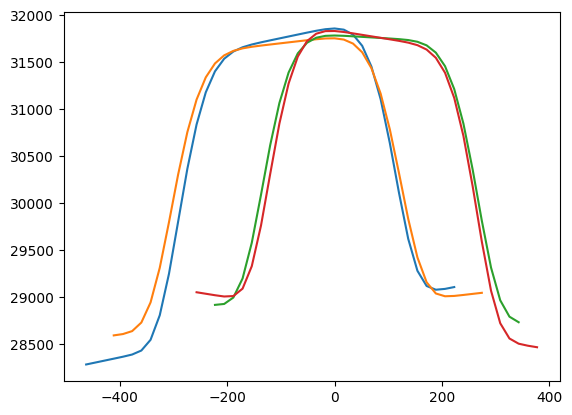

In [15]:
for n in range (0,len(xdata)):
    position_ymax = np.argmax(yfit[n])
    plt.plot(xdata[n]-xdata[n][position_ymax], yfit[n])
plt.show()

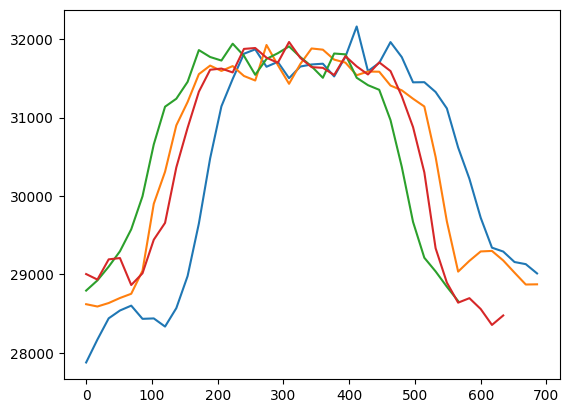

In [16]:
for n in range (0,len(xdata)):
    plt.plot(xdata[n], ydata[n])
plt.show()
